In [204]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv


# **✅ Table of Contents**
-------------------------
✅ **Import libraries.**   
✅ **Data Import & EDA.**   
✅ **Data Visualization.**   
✅ **ML Modeling and Prediction.**   

# **1. Import Libraries**

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **2. Data Import & EDA**

In [206]:
df = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

## **Data Description**
---------------------------
**Target Variable**: 'Target' (Categorical)   
Classes: Dropout, Enrolled, Graduate   

**Feature Categories**   
Gender, Age, Marital Status, Nationality
Parental Education and Occupation
Scholarship, Tuition Fees, Application Mode.   

**Academic History**   
Degree Program, Curricular Units Enrolled & Approved
Grades from 1st and 2nd semesters
Admission Grade, Previous Qualification

## **Summary**

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


## **Missing Value & Duplicate Value Check**

In [209]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Marital Status,0
1,Application mode,0
2,Application order,0
3,Course,0
4,Daytime/evening attendance,0
5,Previous qualification,0
6,Previous qualification (grade),0
7,Nacionality,0
8,Mother's qualification,0
9,Father's qualification,0


In [210]:
df.duplicated().sum()

0

In [211]:
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **3. Data Visualization**

In [212]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

In [213]:
print(num_cols,'\n')
print('length = ',len(num_cols))
print('-'*50)
print(cat_cols,'\n')
print('length = ',len(cat_cols))

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

## **Histogram**

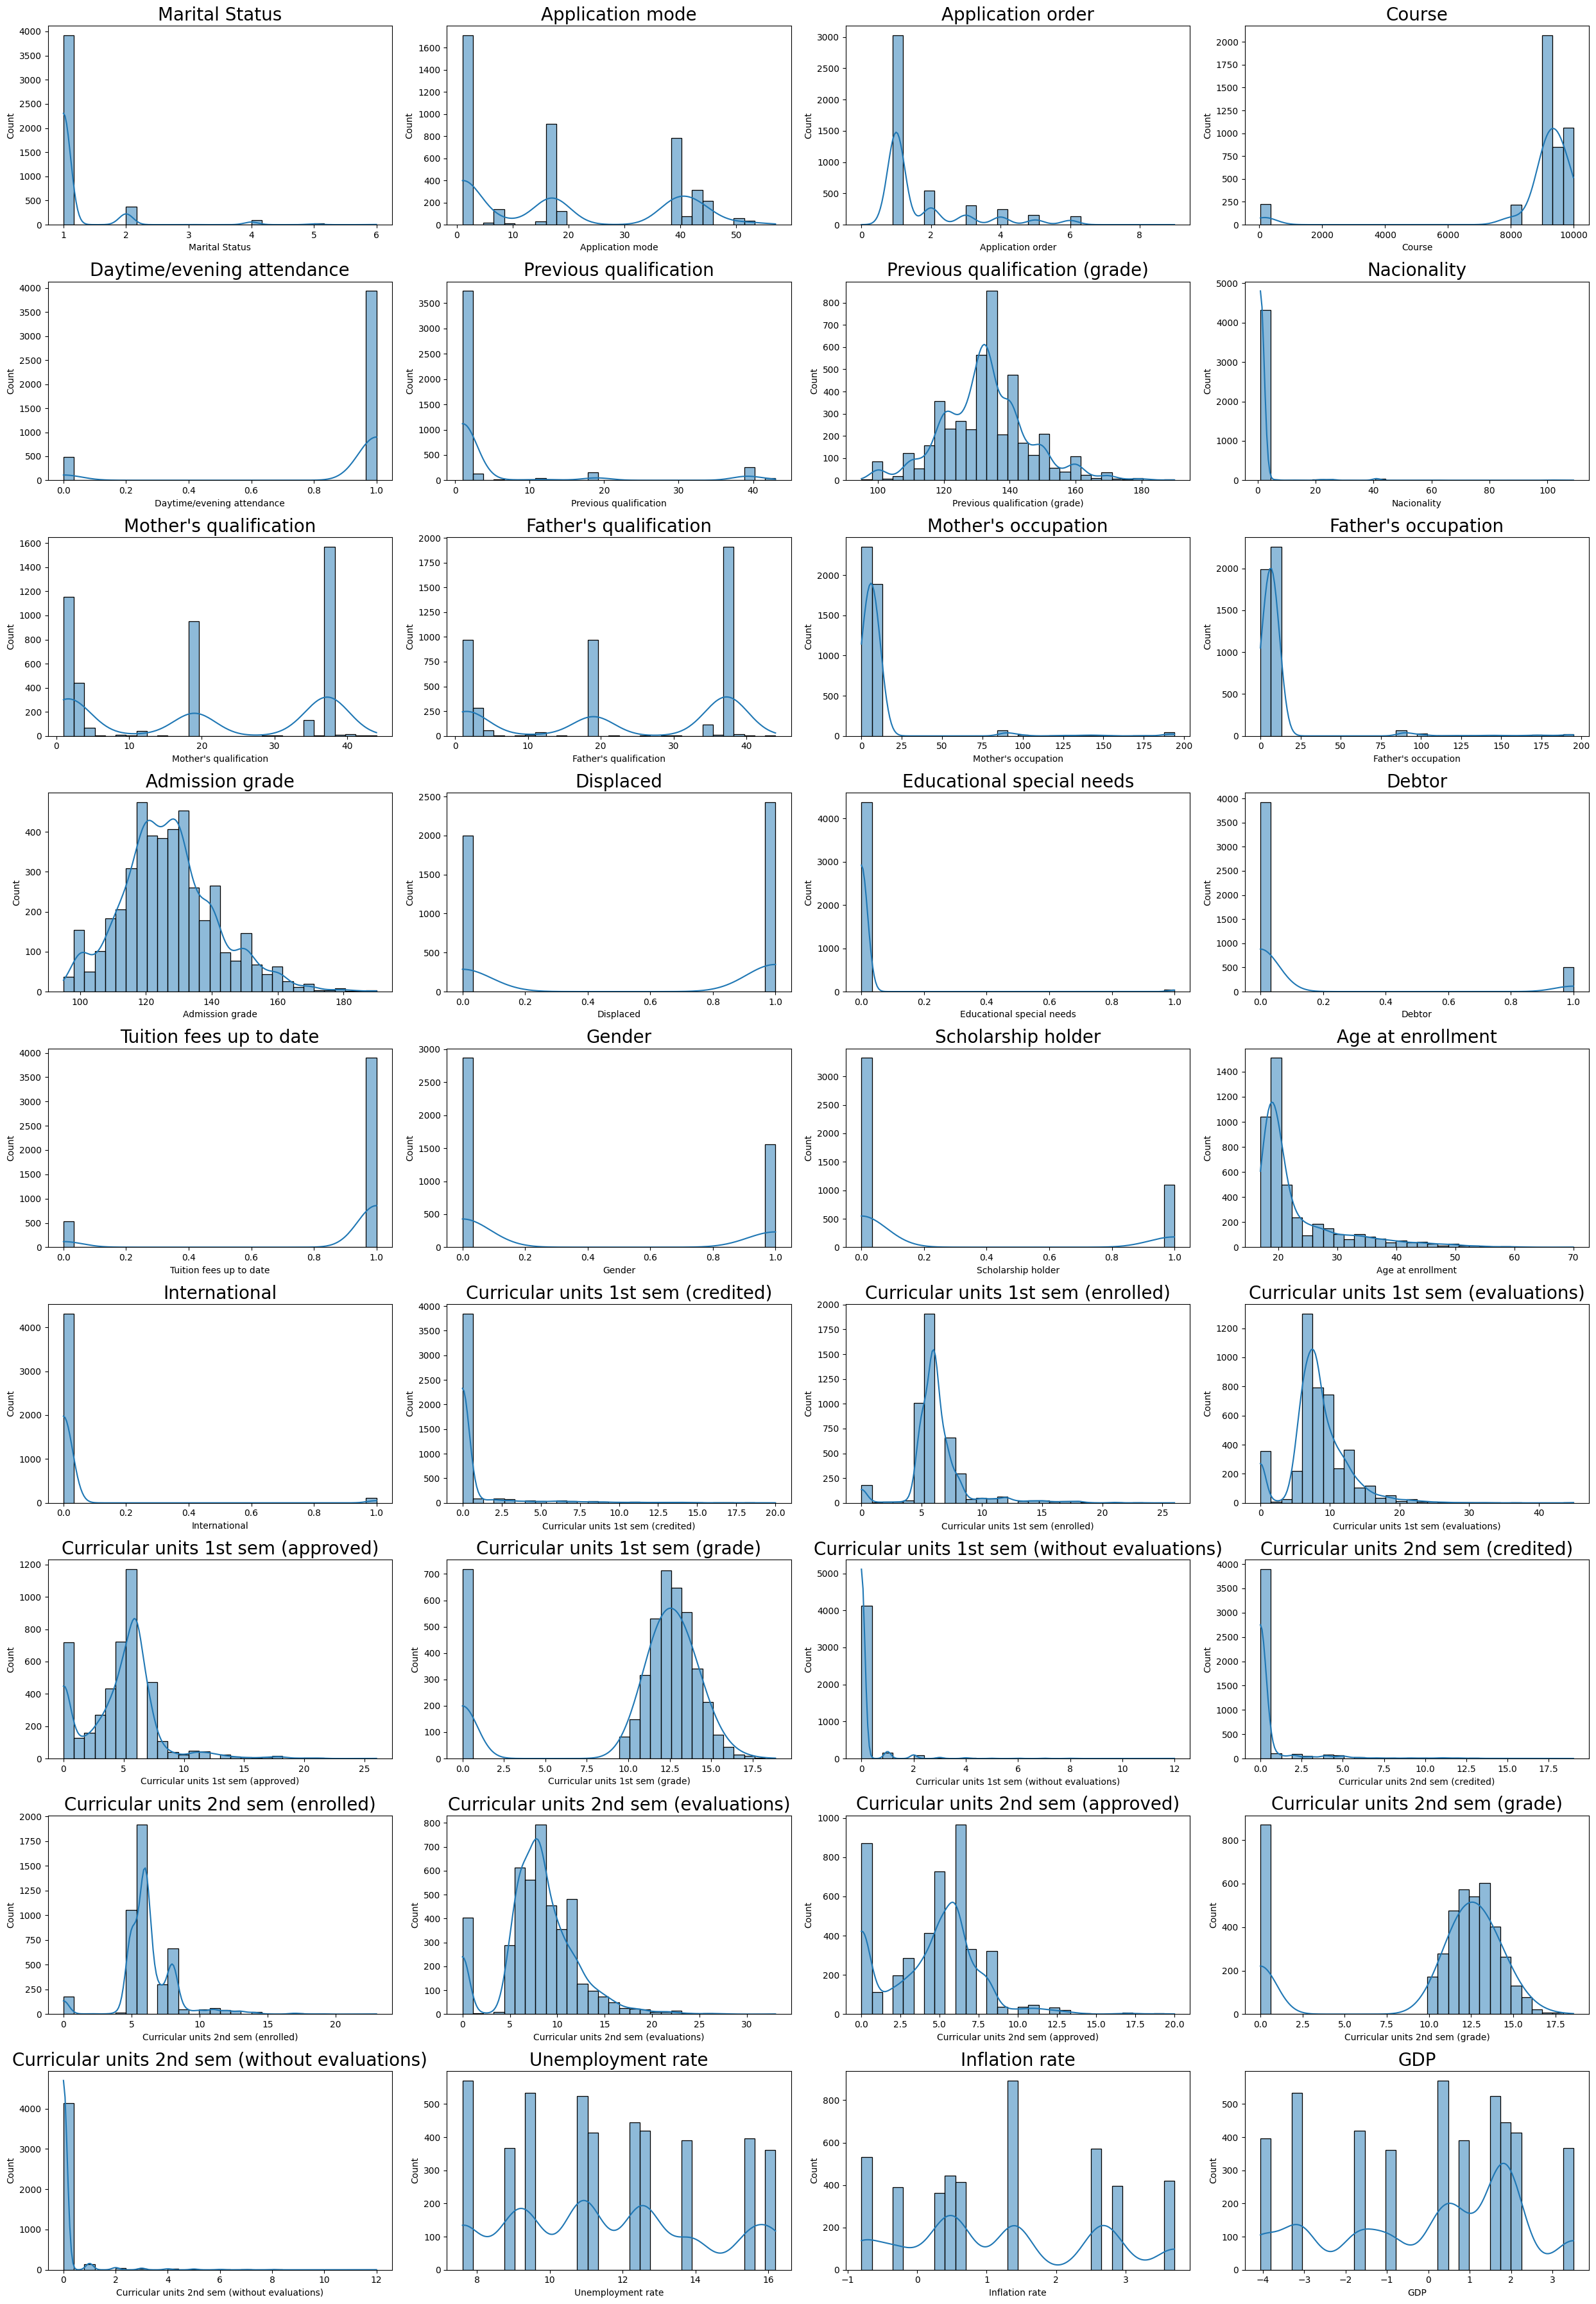

In [214]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(9,4, figsize=(25,2 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)
    
plt.tight_layout()
plt.show()

## **Boxplot**

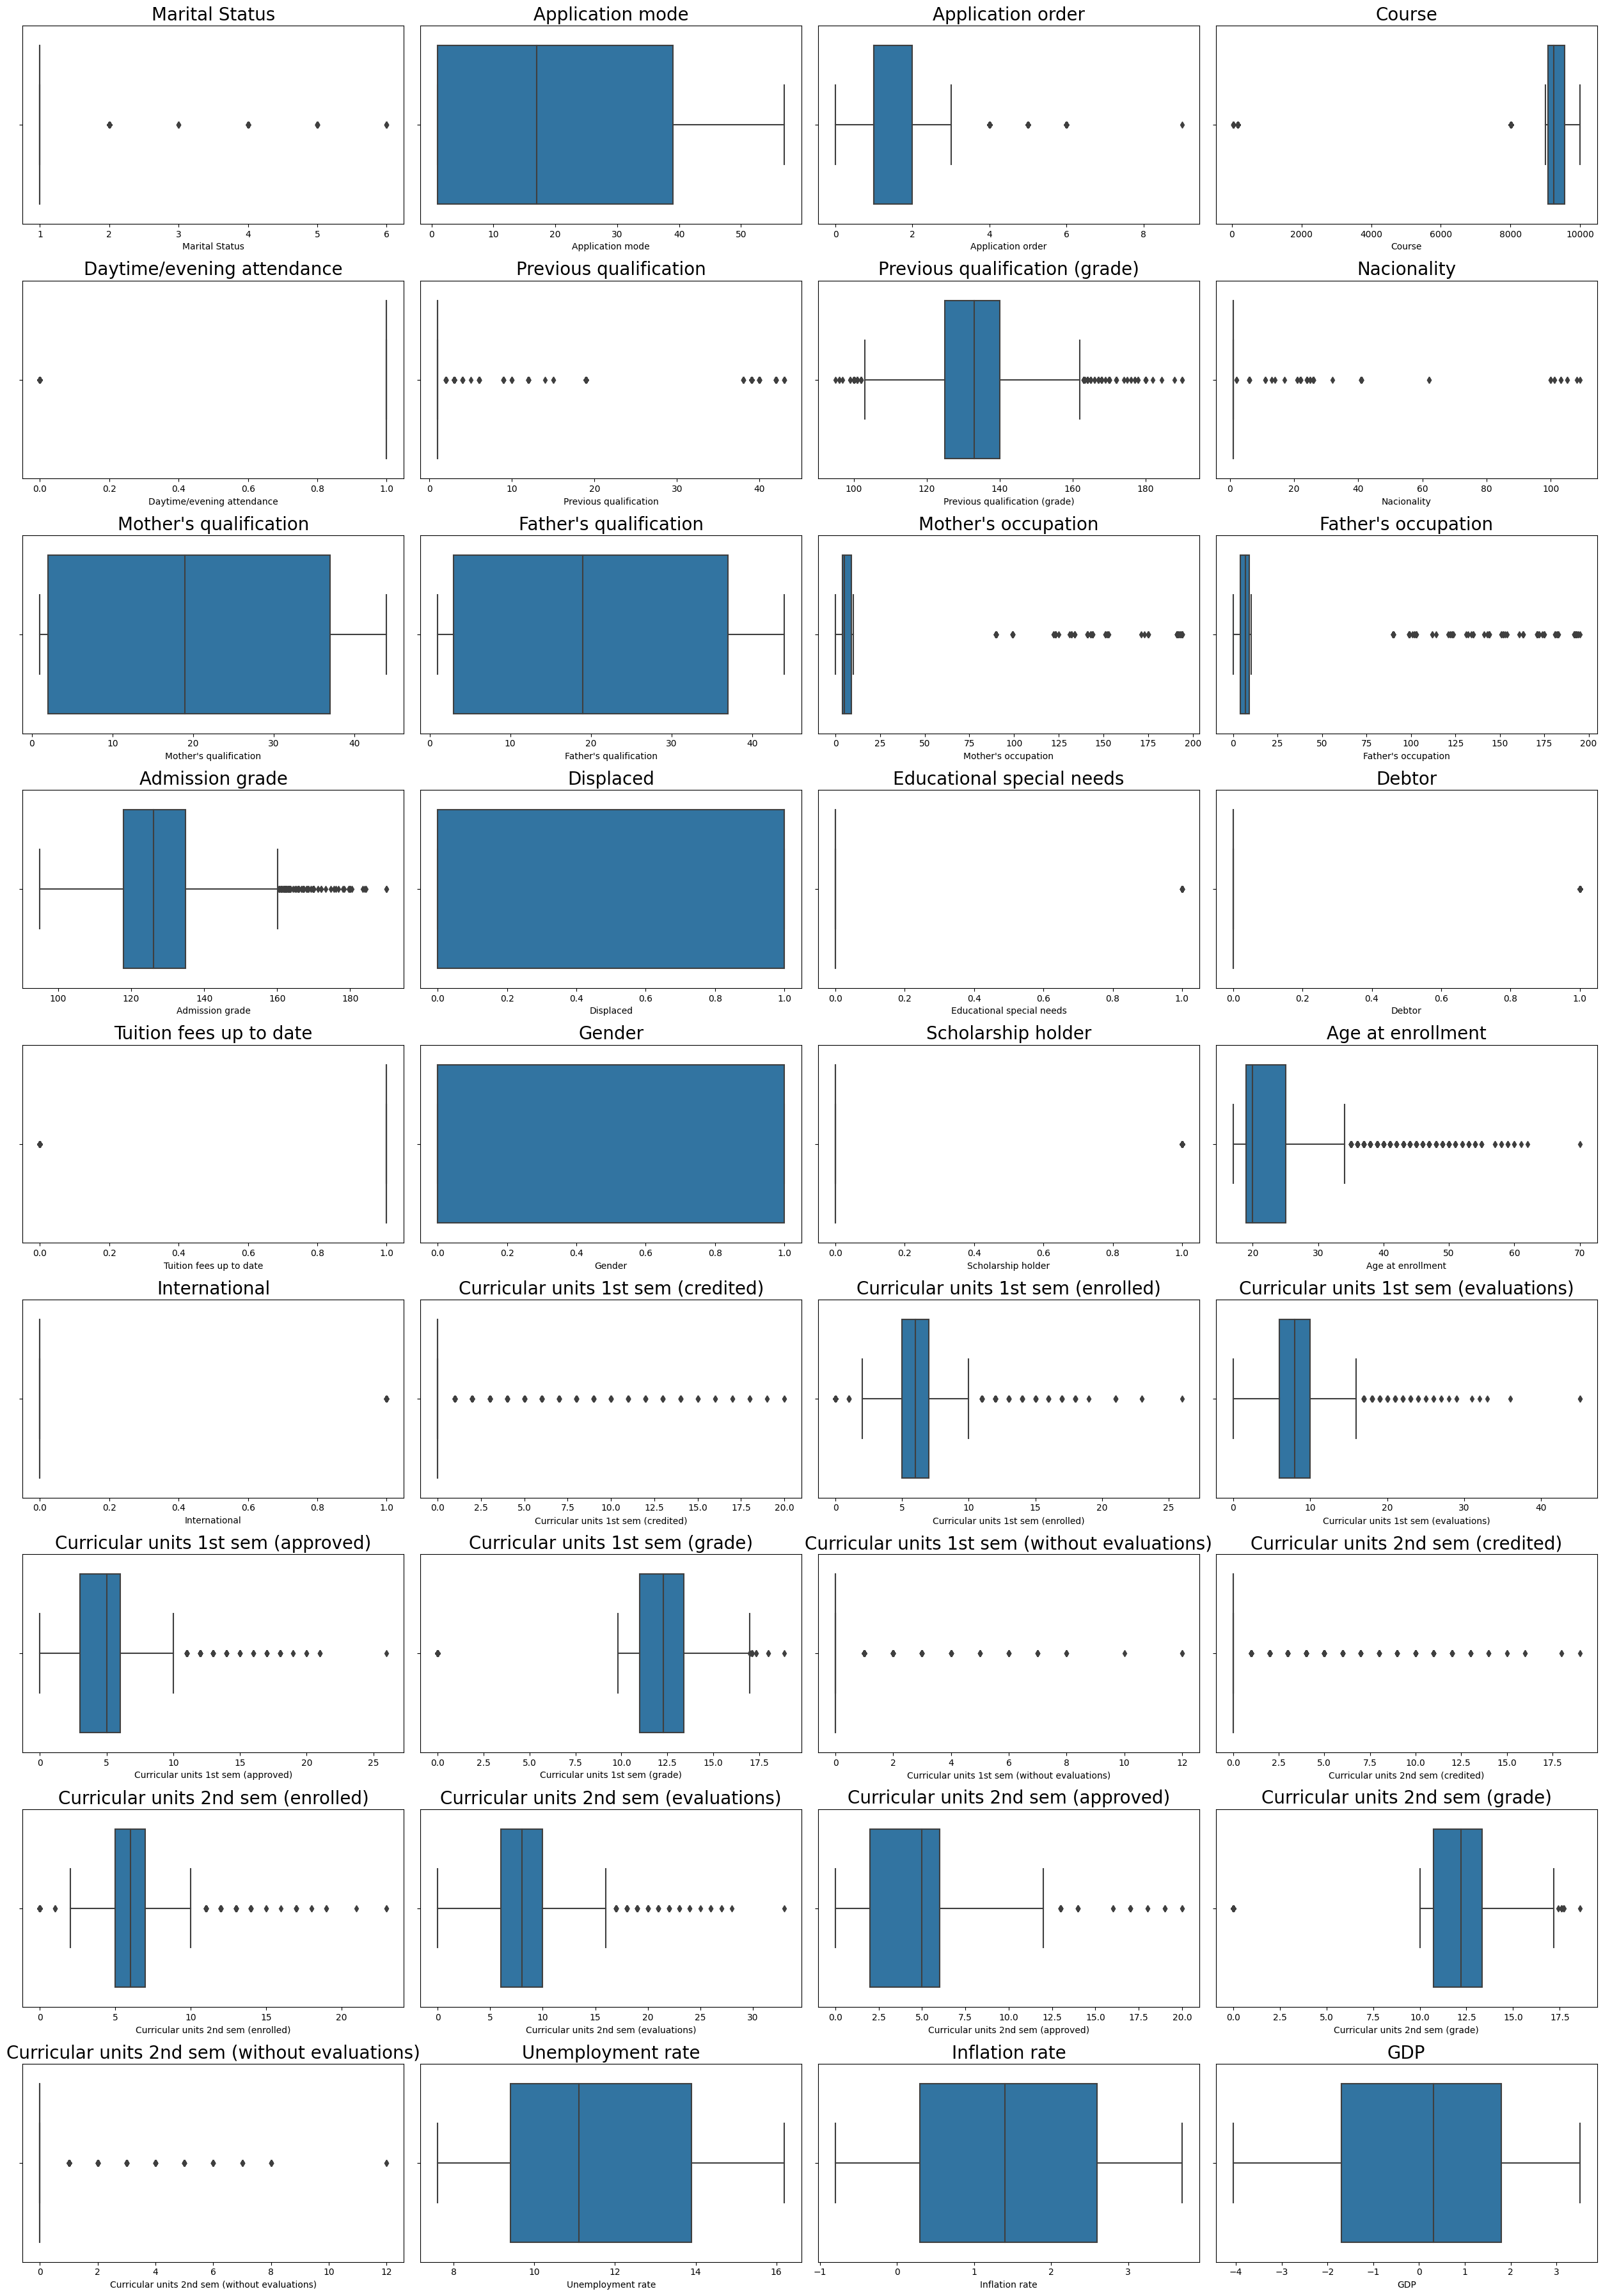

In [215]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(9,4, figsize=(25,2 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols, size=20)
    
plt.tight_layout()
plt.show()

## **Count Plot**

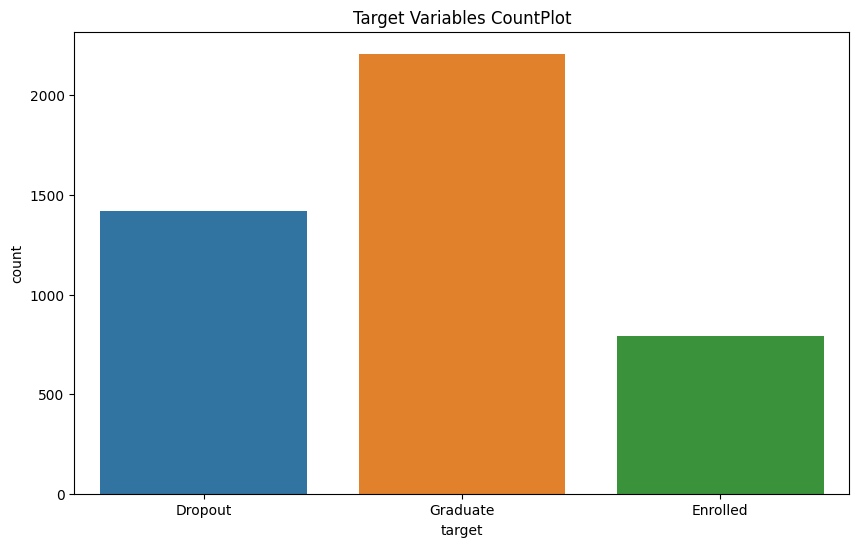

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x = 'target')
plt.title('Target Variables CountPlot')
plt.show()

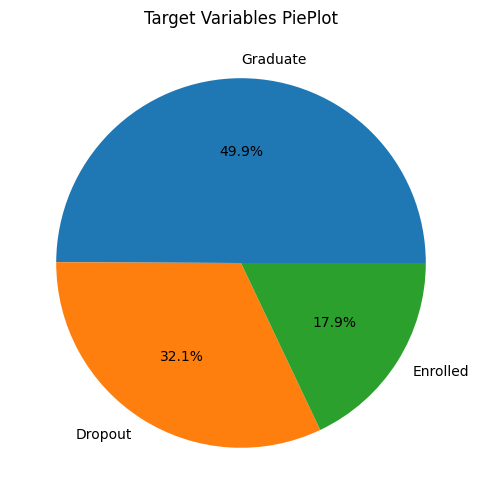

In [217]:
labels = ['Graduate','Dropout', 'Enrolled']

plt.figure(figsize=(10, 6))
plt.pie(df['target'].value_counts() , labels = labels, autopct='%.1f%%' )
plt.title('Target Variables PiePlot')
plt.show()

## **Correlation**

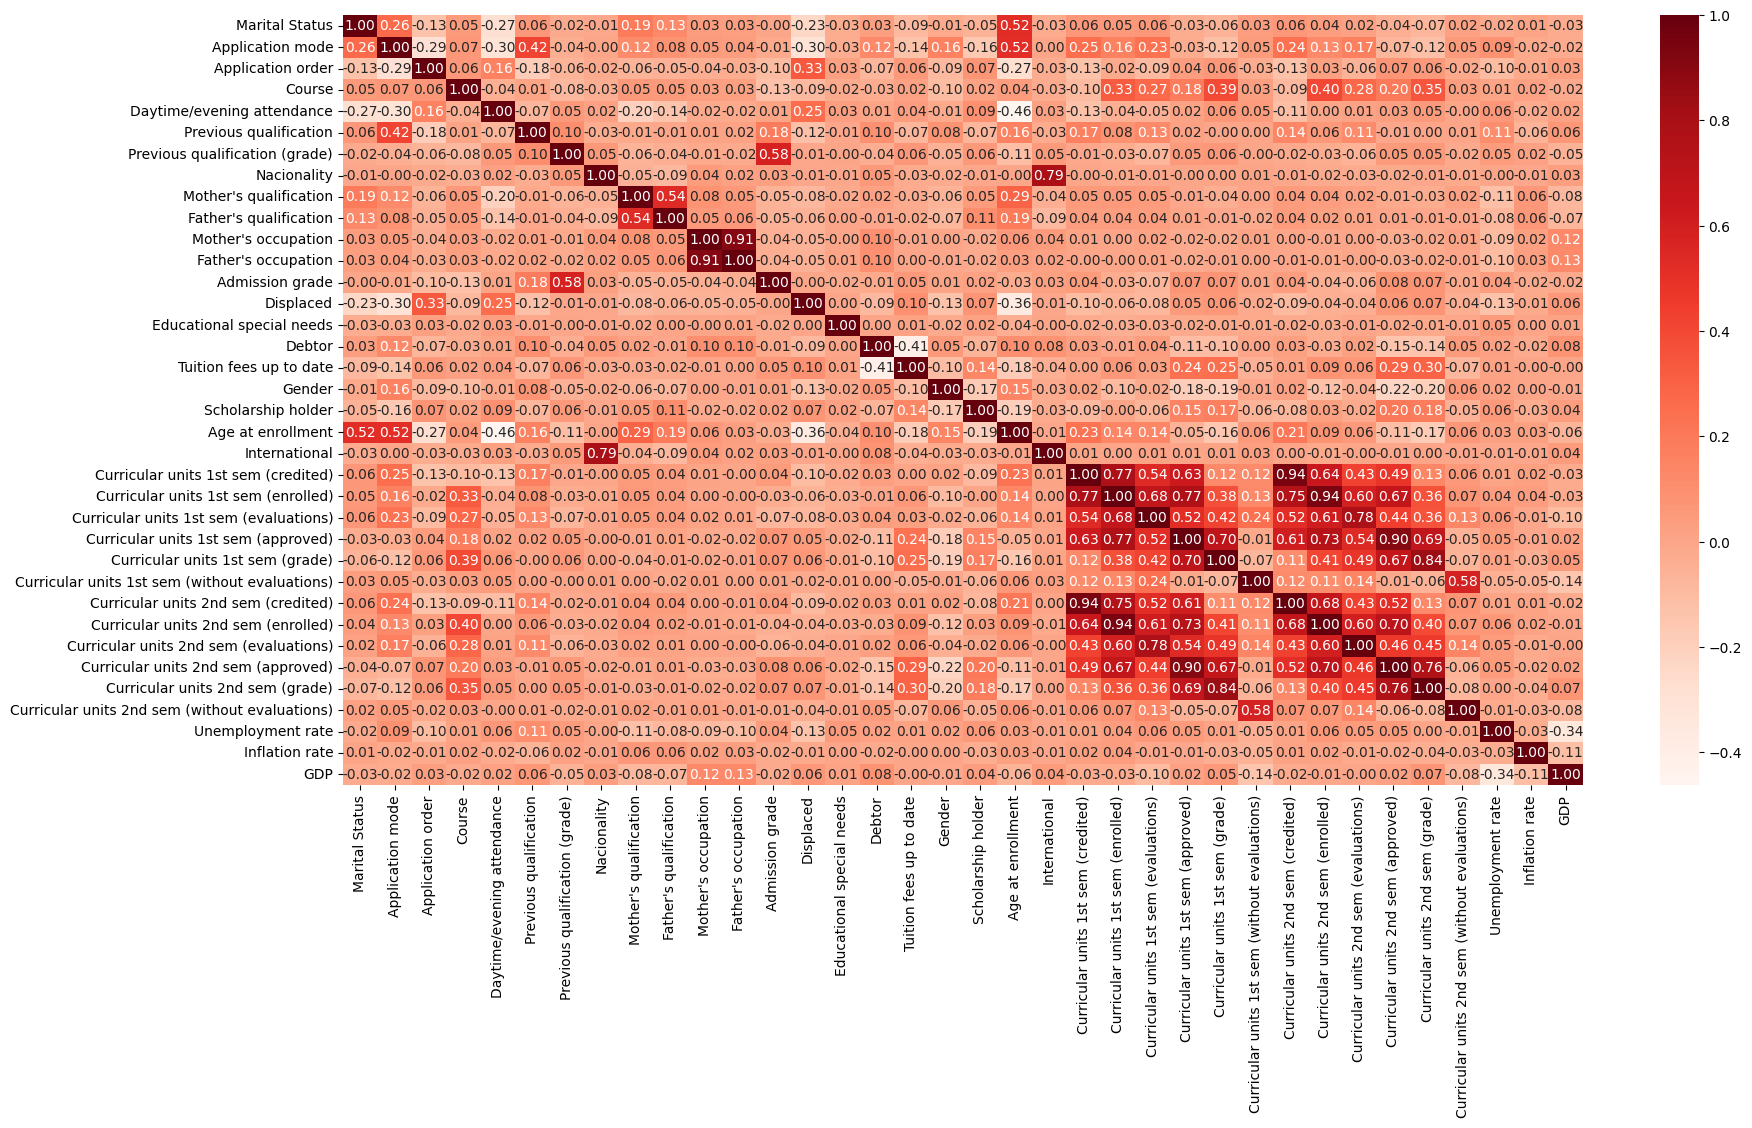

In [218]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [219]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Preprocessing**

In [220]:
#Label Encoding

label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: target
Dropout -> 0
Enrolled -> 1
Graduate -> 2



In [221]:
##df['target']= df['target'].astype(object)

## **Train Test Split**

In [222]:
x = df.drop(columns=['target'])
y = df['target']

In [223]:
x_train, x_test, y_train, y_test =train_test_split(x, y , random_state = 42, test_size= 0.2)

In [224]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **ML**

In [225]:
rfc = RandomForestClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, lgr,xgb]

names = ["Random Forest", "Logistic Regression","XGB"]

Random Forest accuracy: 0.7616
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.38       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



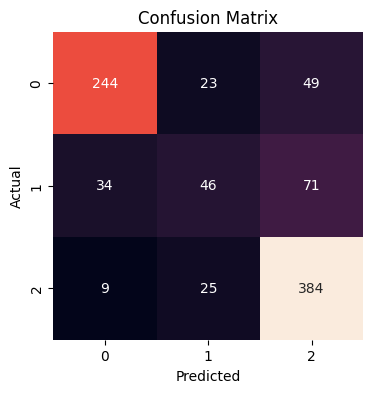

--------------------------------------------------
Logistic Regression accuracy: 0.7525
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



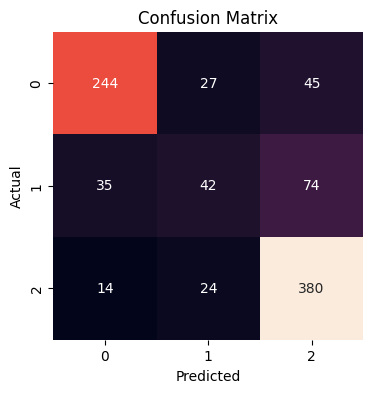

--------------------------------------------------
XGB accuracy: 0.7695
              precision    recall  f1-score   support

     Dropout       0.84      0.75      0.79       316
    Enrolled       0.52      0.43      0.47       151
    Graduate       0.79      0.91      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



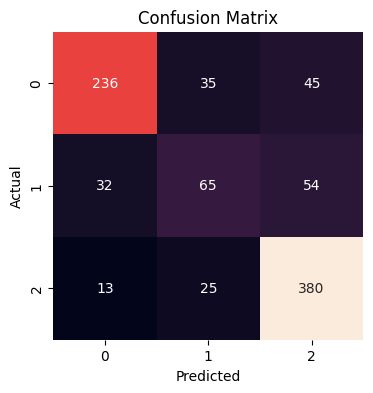

--------------------------------------------------


In [226]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train_scaled, y_train)
    pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred, target_names=label_encoder.classes_))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

## **Model Comparison**

In [227]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,76.158192
1,Logistic Regression,75.254237
2,XGB,76.949153


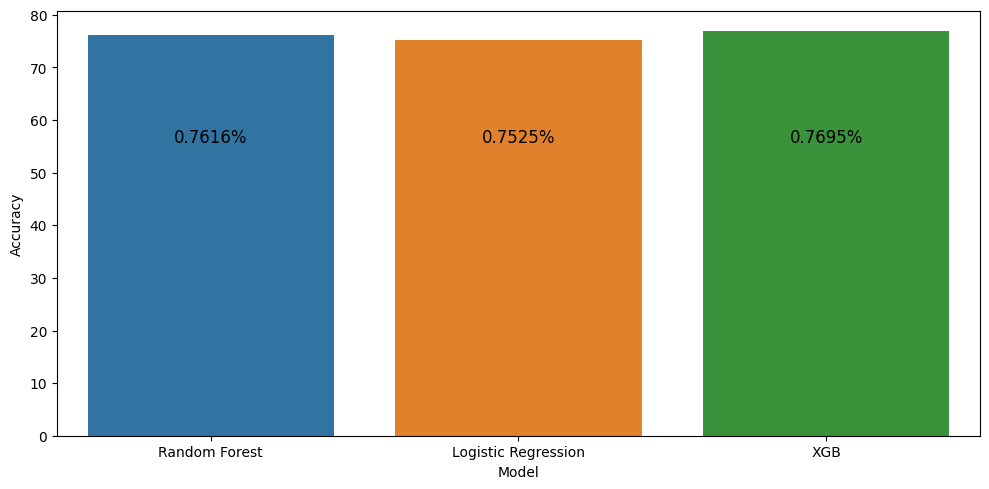

In [228]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 55, f"{value:.4f}%", ha='center', fontsize=12)
    
plt.tight_layout()
plt.show() 

## **Tune**

In [238]:
#Select XGB

n_estimators = [100, 200, 300, 400]
max_depth = [None, 10, 20, 30]
learning_rate = [0.01,0.015,0.02]
min_child_weight = [1,2,3]

parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight
}

In [239]:
random_cv = RandomizedSearchCV(estimator=xgb,
                               param_distributions=parameter_grid,
                               cv=5,
                               n_iter=50,
                               scoring='accuracy',  
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [240]:
random_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END max_depth=None, n_estimators=100;, score=(train=1.000, test=0.784) total time=   0.7s
[CV 2/5] END max_depth=None, n_estimators=200;, score=(train=1.000, test=0.790) total time=   1.4s
[CV 1/5] END max_depth=None, n_estimators=300;, score=(train=1.000, test=0.763) total time=   1.9s
[CV 5/5] END max_depth=None, n_estimators=300;, score=(train=1.000, test=0.786) total time=   1.9s
[CV 1/5] END max_depth=10, n_estimators=200;, score=(train=1.000, test=0.746) total time=   1.8s
[CV 5/5] END max_depth=10, n_estimators=200;, score=(train=1.000, test=0.782) total time=   1.8s
[CV 4/5] END max_depth=10, n_estimators=300;, score=(train=1.000, test=0.768) total time=   2.3s
[CV 3/5] END max_depth=20, n_estimators=100;, score=(train=1.000, test=0.780) total time=   1.4s
[CV 2/5] END max_depth=20, n_estimators=200;, score=(train=1.000, test=0.778) total time=   2.0s
[CV 1/5] END max_depth=20, n_estimators=300;, score=(trai

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.015, 0.02],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=5)

In [241]:
best_params = random_cv.best_params_
best_score = random_cv.best_score_

In [242]:
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'n_estimators': 400, 'min_child_weight': 1, 'max_depth': None, 'learning_rate': 0.015}
Best score: 0.7812959988492796


In [243]:
best_model_xgb = random_cv.best_estimator_
pred_xgb2 = best_model_xgb.predict(x_test_scaled)

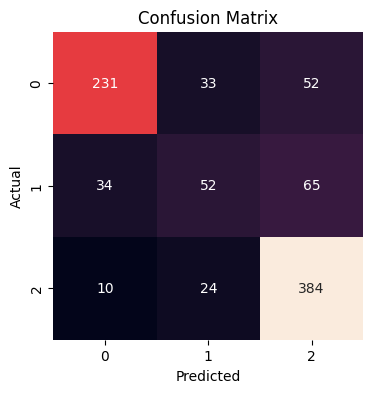

In [244]:
accuracy2 = accuracy_score(y_test, pred_xgb2)
cm2 = confusion_matrix(y_test, pred_xgb2)
plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [245]:
model_xgb_report = classification_report(y_test, pred_xgb2)
print(f'XGB Model accuracy: {round(accuracy2,4)}')
print('Classification Report:')
print(f'{model_xgb_report}')

XGB Model accuracy: 0.7537
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       316
           1       0.48      0.34      0.40       151
           2       0.77      0.92      0.84       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



## **Feature Importance**

In [246]:
#Select xgb model

sorted_idx = (-xgb.feature_importances_).argsort()
list_of_tuples = list(zip(x.columns[sorted_idx],
                           rfc.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,Curricular units 2nd sem (approved),0.131092
1,Tuition fees up to date,0.043162
2,Curricular units 1st sem (enrolled),0.018683
3,Curricular units 1st sem (approved),0.097350
4,Curricular units 2nd sem (enrolled),0.022595
5,Scholarship holder,0.018085
6,Curricular units 1st sem (evaluations),0.037368
7,Curricular units 2nd sem (evaluations),0.043673
8,Curricular units 2nd sem (credited),0.005536
9,Course,0.032709


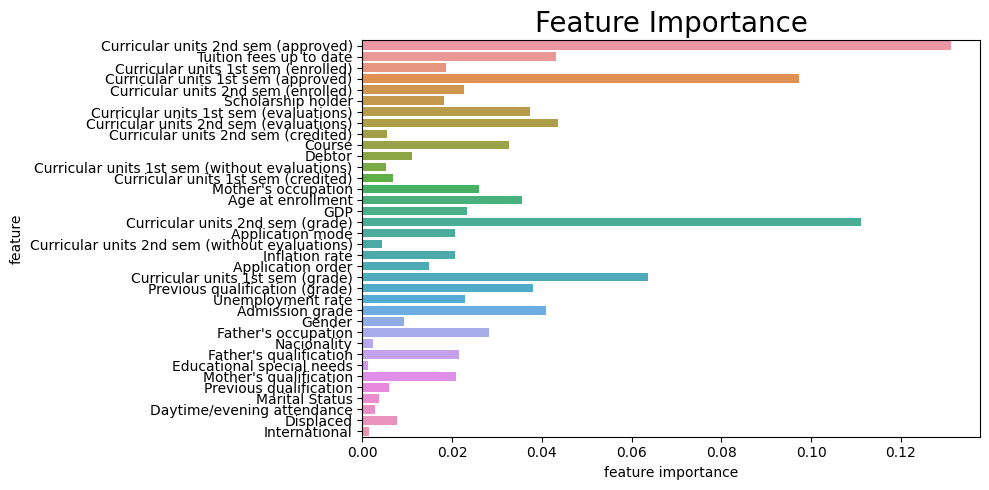


[CV 1/5] END learning_rate=0.01, max_depth=30, min_child_weight=1, n_estimators=100;, score=(train=0.987, test=0.739) total time=   4.4s
[CV 5/5] END learning_rate=0.01, max_depth=30, min_child_weight=1, n_estimators=100;, score=(train=0.982, test=0.768) total time=   4.4s
[CV 1/5] END learning_rate=0.01, max_depth=None, min_child_weight=3, n_estimators=300;, score=(train=0.881, test=0.767) total time=   2.7s
[CV 5/5] END learning_rate=0.01, max_depth=None, min_child_weight=3, n_estimators=300;, score=(train=0.870, test=0.789) total time=   2.8s
[CV 4/5] END learning_rate=0.015, max_depth=30, min_child_weight=3, n_estimators=200;, score=(train=0.983, test=0.761) total time=   5.9s
[CV 3/5] END learning_rate=0.02, max_depth=10, min_child_weight=1, n_estimators=400;, score=(train=1.000, test=0.771) total time=   8.4s
[CV 2/5] END learning_rate=0.01, max_depth=30, min_child_weight=2, n_estimators=300;, score=(train=0.993, test=0.770) total time=   9.4s
[CV 1/5] END learning_rate=0.02, ma

In [247]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=20)
plt.tight_layout()
plt.show()

-------------------------
**Thankyou. Please leave your advice in the comments.**